In [1]:
import os
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
accounts = []
follower_ids = []
for file in [file for file in os.listdir("follower_ids") if file.endswith(".txt")]:
    account = file[7:][:-17]
    accounts.append(account)
    with open(f"follower_ids/{file}") as f:    
        followers = f.read().split("\n")
    follower_ids.append(followers)

In [3]:
all_follower_ids = []

for follower_list in follower_ids:
    all_follower_ids.extend(follower_list)

In [4]:
df = pd.DataFrame(pd.Series(all_follower_ids).value_counts()).reset_index().rename({"index":"id", 0:"follow_count"}, axis=1)

In [5]:
df["follow_percentage"] = df["follow_count"] / len(os.listdir("follower_ids")) * 100

In [6]:
len(os.listdir("follower_ids"))

175

In [7]:
df.head()

,id,follow_count,follow_percentage
0,1259092089117331461,59,33.714286
1,84112546,51,29.142857
2,329232768,48,27.428571
3,4547192416,39,22.285714
4,1419322620,37,21.142857


In [8]:
follow_counts = pd.DataFrame(df["follow_count"].value_counts()).reset_index().rename({"index": "num_accounts"}, axis=1).sort_values("num_accounts")
follow_counts

,num_accounts,follow_count
0,1,2371273
1,2,138427
2,3,41568
3,4,13846
4,5,6657
5,6,3505
6,7,2039
7,8,1204
8,9,784
9,10,505


In [9]:
df.shape[0]

2580920

In [10]:
follow_counts[follow_counts["num_accounts"] > 1]["follow_count"].sum()

209647

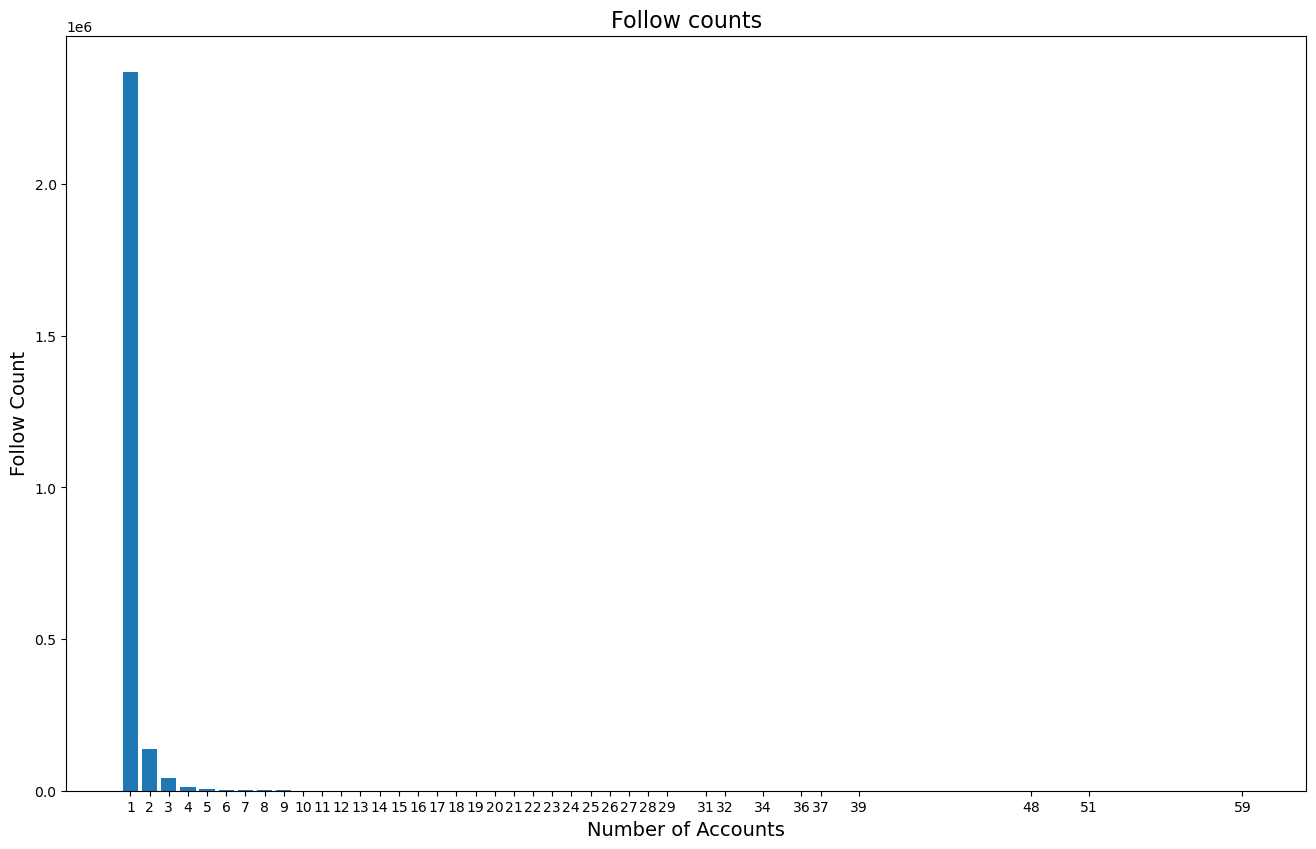

In [11]:
plt.figure(figsize=(16, 10), dpi=100)
plt.bar(follow_counts["num_accounts"], follow_counts["follow_count"])
plt.xticks(follow_counts["num_accounts"])
plt.title("Follow counts", fontsize=16)
plt.xlabel("Number of Accounts", fontsize=14)
plt.ylabel("Follow Count", fontsize=14)
plt.show()

## Split into Batches

In [12]:
user_ids = list(df[df["follow_count"] >= 3]["id"])
len(user_ids)

71220

In [13]:
if "kadikoy_user_ids" not in os.listdir():
    os.mkdir("kadikoy_user_ids")

In [14]:
batch_no = 1

for i in range(0, len(user_ids), 9_000):
    print(f"Batch No: {batch_no} | {i} - {i+9_000}")
    
    with open(f"kadikoy_user_ids/kadikoy_user_ids-{batch_no}.txt", "w+") as f:
        f.write("\n".join(user_ids[i:i+10_000]))
    
    batch_no += 1

Batch No: 1 | 0 - 9000
Batch No: 2 | 9000 - 18000
Batch No: 3 | 18000 - 27000
Batch No: 4 | 27000 - 36000
Batch No: 5 | 36000 - 45000
Batch No: 6 | 45000 - 54000
Batch No: 7 | 54000 - 63000
Batch No: 8 | 63000 - 72000
